In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import vega_datasets

## 1. Resample by the day and take the average temperature. Visualize the average temperature over time.


In [2]:
df = vega_datasets.data.sf_temps()
df

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00
...,...,...
8754,50.4,2010-12-31 19:00:00
8755,49.9,2010-12-31 20:00:00
8756,49.4,2010-12-31 21:00:00
8757,48.8,2010-12-31 22:00:00


In [3]:
pd.to_datetime('2010-01-01 19-PM', format='%Y-%m-%d %H-%p')

Timestamp('2010-01-01 19:00:00')

In [4]:
df.date = pd.to_datetime(df.date, format='%Y-%m-%d %H-%p')

In [5]:
#setting date as index
df = df.set_index('date')
df.head()

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0


<AxesSubplot:title={'center':'avg_daily'}, xlabel='date'>

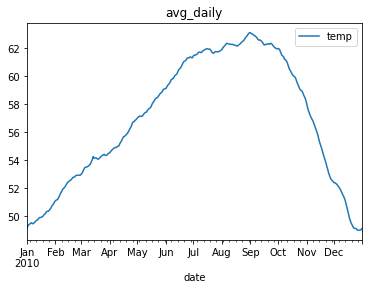

In [6]:
df.resample("D").mean().plot( title = "avg_daily")

<AxesSubplot:xlabel='date'>

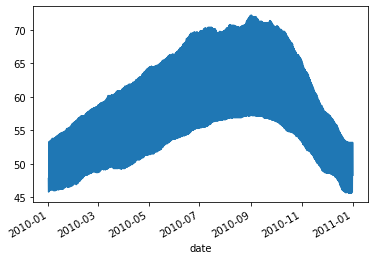

In [7]:
df.temp.plot()

## 2. Write the code necessary to visualize the minimum temperature over time.


In [8]:
df.index.day_name()

Index(['Friday', 'Friday', 'Friday', 'Friday', 'Friday', 'Friday', 'Friday',
       'Friday', 'Friday', 'Friday',
       ...
       'Friday', 'Friday', 'Friday', 'Friday', 'Friday', 'Friday', 'Friday',
       'Friday', 'Friday', 'Friday'],
      dtype='object', name='date', length=8759)

In [9]:
df["weekday_name"] = df.index.day_name()

In [10]:
df

,temp,weekday_name
date,,
2010-01-01 00:00:00,47.8,Friday
2010-01-01 01:00:00,47.4,Friday
2010-01-01 02:00:00,46.9,Friday
2010-01-01 03:00:00,46.5,Friday
2010-01-01 04:00:00,46.0,Friday
...,...,...
2010-12-31 19:00:00,50.4,Friday
2010-12-31 20:00:00,49.9,Friday
2010-12-31 21:00:00,49.4,Friday


<AxesSubplot:xlabel='weekday_name'>

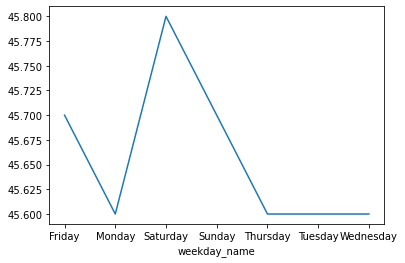

In [11]:
df.groupby('weekday_name').min().temp.plot()



## 3. Write the code necessary to visualize the maximum temperature over time.

<AxesSubplot:xlabel='weekday_name'>

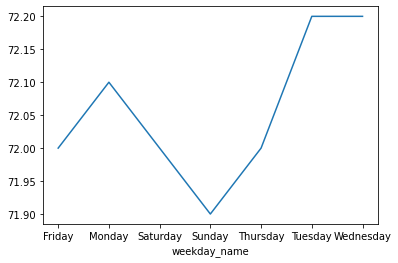

In [12]:
df.groupby('weekday_name').max().temp.plot()


## 4.Which month is the coldest, on average?


In [13]:
# aliasing by month 
df["month_name"] = df.index.month_name()
by_month = df.asfreq('M')
by_month.head()

,temp,weekday_name,month_name
date,,,
2010-01-31,49.4,Sunday,January
2010-02-28,51.0,Sunday,February
2010-03-31,51.4,Wednesday,March
2010-04-30,53.0,Friday,April
2010-05-31,55.0,Monday,May


In [14]:
by_month.min()

temp              47.7
weekday_name    Friday
month_name       April
dtype: object

## 5. Which month has the highest average temperature?


In [15]:
by_month.max()

temp                 58.8
weekday_name    Wednesday
month_name      September
dtype: object

## 6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?


In [16]:
# change in temp by day
day_sample = df.resample('D').temp.agg(['min', 'max'])

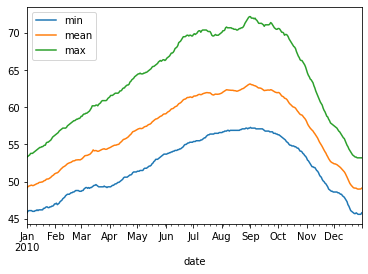

In [17]:
df.resample('D').temp.agg(['min', 'mean', 'max'])['min'].plot(label = 'min')
df.resample('D').temp.agg(['min', 'mean', 'max'])['mean'].plot(label = 'mean')
df.resample('D').temp.agg(['min', 'mean', 'max'])['max'].plot(label = 'max')
plt.legend()

# seattle

- Which year and month combination has the highest amount of precipitation?
- Visualize the amount of monthly precipitation over time.
- Visualize the amount of wind over time. Choose a time interval you think is appropriate.
- Which year-month combination is the windiest?
- What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)
- In which month does it rain the most?
- Which month has the most number of days with a non-zero amount of precipitation?

In [18]:
from vega_datasets import data
sw_df = data.seattle_weather()
sw_df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [19]:
pd.to_datetime('2012-01-01', format='%Y-%m-%d')

Timestamp('2012-01-01 00:00:00')

In [20]:
sw_df.date = pd.to_datetime(sw_df.date, format='%Y-%m-%d' )

In [21]:
sw_df = sw_df.set_index('date')
sw_df.head()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain


#### - Which year and month combination has the highest amount of precipitation?


In [22]:

sw_df['month'] = sw_df.index.strftime('%m-%b')
sw_df['year'] = sw_df.index.year
sw_df.head()

,precipitation,temp_max,temp_min,wind,weather,month,year
date,,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle,01-Jan,2012
2012-01-02,10.9,10.6,2.8,4.5,rain,01-Jan,2012
2012-01-03,0.8,11.7,7.2,2.3,rain,01-Jan,2012
2012-01-04,20.3,12.2,5.6,4.7,rain,01-Jan,2012
2012-01-05,1.3,8.9,2.8,6.1,rain,01-Jan,2012


In [23]:
sw_df.resample('M').precipitation.sum().sort_values().tail(1)


date
2015-12-31    284.5
Name: precipitation, dtype: float64

#### Visualize the amount of monthly precipitation over time.


<AxesSubplot:title={'center':'Monthly Precipitation'}, xlabel='date'>

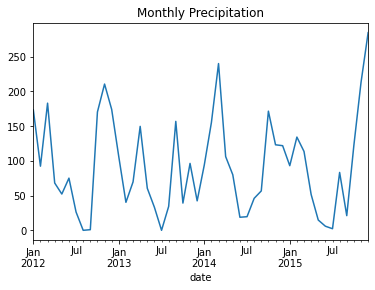

In [25]:
sw_df.resample('M').precipitation.sum().plot(title='Monthly Precipitation')


#### Visualize the amount of wind over time. Choose a time interval you think is appropriate.


<AxesSubplot:title={'center':'Weekly Wind Average'}, xlabel='date'>

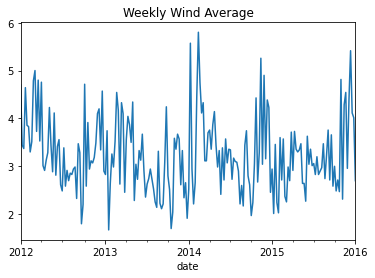

In [27]:
sw_df.resample('w').wind.mean().plot(title='Weekly Wind Average')


#### Which year-month combination is the windiest?


In [32]:
sw_df.groupby(['year', 'month']).sum().wind.idxmax()


(2015, '12-Dec')

#### What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)


In [38]:
#grouping by year
sw_df['sunny'] = sw_df.weather == 'sun'
sw_df.groupby(['year']).sunny.mean().sort_values().tail(1)

year
2014    0.578082
Name: sunny, dtype: float64

#### In which month does it rain the most?


In [39]:
sw_df.groupby('month').precipitation.sum().sort_values().tail(1)


month
11-Nov    642.5
Name: precipitation, dtype: float64

#### Which month has the most number of days with a non-zero amount of precipitation?


In [44]:
sw_df['nonzero_precipitation'] = sw_df.precipitation > 0
sw_df.groupby('month').nonzero_precipitation.mean().sort_values().tail()

month
01-Jan    0.532258
03-Mar    0.588710
11-Nov    0.591667
02-Feb    0.646018
12-Dec    0.653226
Name: nonzero_precipitation, dtype: float64

In [41]:
sw_df.head()

,precipitation,temp_max,temp_min,wind,weather,month,year,sunny,nonzero_precipitation
date,,,,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle,01-Jan,2012,False,False
2012-01-02,10.9,10.6,2.8,4.5,rain,01-Jan,2012,False,True
2012-01-03,0.8,11.7,7.2,2.3,rain,01-Jan,2012,False,True
2012-01-04,20.3,12.2,5.6,4.7,rain,01-Jan,2012,False,True
2012-01-05,1.3,8.9,2.8,6.1,rain,01-Jan,2012,False,True


## Flights data

In [49]:
flights_df = data.flights_20k()
flights_df = df.sort_values(by='date').reset_index(drop=True)
flights_df = flights_df.set_index('date')
flights_df.head()

,delay,distance,origin,destination
date,,,,
2001-01-01 00:01:00,14,405,MCI,MDW
2001-01-01 06:20:00,0,491,BNA,MCI
2001-01-01 06:30:00,-8,251,MDW,STL
2001-01-01 07:00:00,-10,361,OAK,ONT
2001-01-01 07:00:00,0,303,MSY,HOU


#### Convert any negative delays to 0.


In [53]:
pd.Series(range(1, 11)).clip(lower=3, upper=7)
flights_df.delay.clip(lower=0)
flights_df.delay = np.where(flights_df.delay < 0, 0, flights_df.delay)
flights_df.head()

,delay,distance,origin,destination
date,,,,
2001-01-01 00:01:00,14,405,MCI,MDW
2001-01-01 06:20:00,0,491,BNA,MCI
2001-01-01 06:30:00,0,251,MDW,STL
2001-01-01 07:00:00,0,361,OAK,ONT
2001-01-01 07:00:00,0,303,MSY,HOU


#### Which hour of the day has the highest average delay?


In [55]:
flights_df['hour'] = flights_df.index.hour
flights_df.groupby('hour').delay.mean().sort_values().tail(1)


hour
3    302.5
Name: delay, dtype: float64

#### Does the day of the week make a difference in the delay amount?


In [57]:
flights_df['weekday'] = flights_df.index.strftime('%w-%a')
flights_df.groupby('weekday').delay.mean().sort_values()

weekday
1-Mon     7.165772
6-Sat     8.431498
2-Tue     9.410866
0-Sun    10.413542
3-Wed    11.032478
4-Thu    12.821322
5-Fri    17.757596
Name: delay, dtype: float64

#### Does the month make a difference in the delay amount?


In [58]:
flights_df['month'] = flights_df.index.strftime('%m-%b')
flights_df.groupby('month').delay.mean()

month
01-Jan    11.301592
02-Feb    12.306106
03-Mar     9.875287
Name: delay, dtype: float64

    month
    01-Jan    11.301592
    02-Feb    12.306106
    03-Mar     9.875287
    Name: delay, dtype: float64
    When creating features for weekday or month, prefer:

    df['weekday'] = df.index.strftime('%w-%a')
    df['month'] = df.index.strftime('%m-%b')
    instead of:

    df['weekday'] = df.index.day_name()
    df['month'] = df.index.month
    this allows us to see not just the number of the month / weekday, but also it's name. In addition, prefixing the name with the number allows the values to be sorted in the propert order for, e.g., visualizations.